<a href="https://colab.research.google.com/github/choiseoyoungg/class_deeplearningportpolio/blob/main/logistic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#confusion matrix

y_actual=[1,1,0,1,0,0,1,0,0,0]
y_predicted=[1,0,0,1,0,0,1,1,1,0]


In [3]:
CM=confusion_matrix(y_actual,y_predicted)
print('Confusion Matrix=\n',CM)

Confusion Matrix=
 [[4 2]
 [1 3]]


In [4]:
#matplotlib를 통한 시각화

import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

  import itertools
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shaple[1])):
    plt.text(i,j,format(cm[i,j],fmt), horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

Confusion matrix, without normalization
[[4 2]
 [1 3]]


AttributeError: ignored

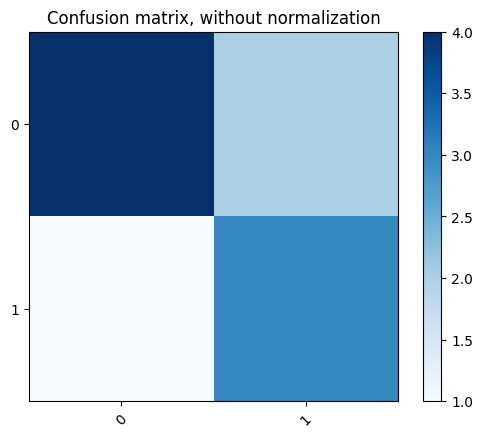

In [5]:
import numpy as np

cnf_matrix=confusion_matrix(y_actual, y_predicted, labels=[0,1])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], title='Confusion matrix, without normalization')

In [ ]:
print('Accuracy=',accuracy_score(y_actual, y_predicted))
print('Report=\n', classification_report(y_actual,y_predicted))

Accuracy= 0.7
Report=
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



#multiclass confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [9]:
classes=['Cat','Dog','Rabbit']

y_actual=['Cat','Dog','Rabbit','Cat','Cat','Rabbit']
y_predicted=['Dog','Dog','Rabbit','Dog','Dog','Rabbit']


In [10]:
CM=confusion_matrix(y_actual,y_predicted)
print('Confusion Matrix=\n',CM)

Confusion Matrix=
 [[0 3 0]
 [0 1 0]
 [0 0 2]]


In [11]:
#matplotlib를 통한 시각화

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  import itertools
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")

  else:
    print('Confusion matrix, without normalization')

  print(cm)




In [12]:
import numpy as np
cnf_matrix=confusion_matrix(y_actual, y_predicted, labels=['Cat', 'Dog', 'Rabbit'])
np.set_printoptions(precision=2)


plot_confusion_matrix(cnf_matrix, classes=['Cat','Dog','Rabbit'],
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[0 3 0]
 [0 1 0]
 [0 0 2]]


In [ ]:
#accuracy

print('Accuracy=',accuracy_score(y_actual, y_predicted))
print('Report=\n',classification_report(y_actual, y_predicted))

Accuracy= 0.5
Report=
               precision    recall  f1-score   support

         Cat       0.00      0.00      0.00         3
         Dog       0.25      1.00      0.40         1
      Rabbit       1.00      1.00      1.00         2

    accuracy                           0.50         6
   macro avg       0.42      0.67      0.47         6
weighted avg       0.38      0.50      0.40         6



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Artificial Data

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
x_train=np.array([[1.,1.],
                  [1.,2.],
                  [2.,1.],
                  [3.,2.],
                  [3.,3.],
                  [2.,3.]],
                 dtype=np.float32)
y_train=np.array([[0.],
                  [0.],
                  [0.],
                  [1],
                  [1.],
                  [1.]],
                 dtype=np.float32)

<function matplotlib.pyplot.show(close=None, block=None)>

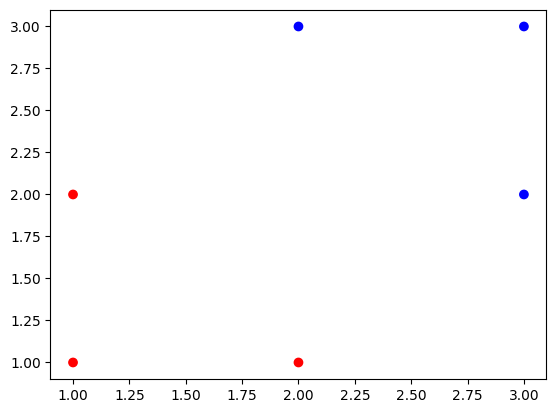

In [15]:
#분류

colors=['red' if I==0 else 'blue' for I in y_train]
plt.scatter(x_train[:,0], x_train[:,1], label='Logistics regression', color=colors)
plt.show


In [16]:
#hypothesis

tf.random.set_seed(2020)
W=tf.Variable(tf.random.normal([2,1],mean=0.0))
b=tf.Variable(tf.random.normal([1], mean=0.0))

print('# Weights:\n', W.numpy(), '\n\n# Bias: \n', b.numpy())

def hypothesis(X):
  z=tf.matmul(X,W)+b
  sigmoid=1/(1+tf.exp(-z))
  return sigmoid


#cost function
def cost_fn(H,Y):
  cost=-tf.reduce_mean(Y*tf.math.log(H)+(1-Y)*tf.math.log(1-H))
  return cost


#minimize cost function
learning_rate=0.01
optimizer=tf.optimizers.SGD(learning_rate)

# Weights:
 [[-0.1 ]
 [ 0.68]] 

# Bias: 
 [0.38]


In [17]:
#train

for step in range(5001):
  with tf.GradientTape() as g:
    pred=hypothesis(x_train)
    cost=cost_fn(pred,y_train)

    gradients=g.gradient(cost,[W,b])

#gradeinte 따른 가중치, bias 업뎃
  optimizer.apply_gradients(zip(gradients,[W,b]))

  if step%200==0:
    print("step=", '%04d' %(step+1),"cost={}, W={}, b={}".format(cost, W.numpy(), b.numpy()))
  
w_hat=W.numpy()
b_hat=b.numpy()

step= 0001 cost=0.7932398319244385, W=[[-0.1 ]
 [ 0.68]], b=[0.38]
step= 0201 cost=0.6531265377998352, W=[[-0.2 ]
 [ 0.49]], b=[0.01]
step= 0401 cost=0.6122190952301025, W=[[-0.09]
 [ 0.49]], b=[-0.26]
step= 0601 cost=0.5754209160804749, W=[[0.01]
 [0.51]], b=[-0.51]
step= 0801 cost=0.5422459840774536, W=[[0.1 ]
 [0.53]], b=[-0.75]
step= 1001 cost=0.5122759938240051, W=[[0.18]
 [0.55]], b=[-0.98]
step= 1201 cost=0.48513635993003845, W=[[0.26]
 [0.58]], b=[-1.2]
step= 1401 cost=0.4604956805706024, W=[[0.33]
 [0.6 ]], b=[-1.41]
step= 1601 cost=0.43806231021881104, W=[[0.4 ]
 [0.63]], b=[-1.6]
step= 1801 cost=0.417581707239151, W=[[0.46]
 [0.66]], b=[-1.8]
step= 2001 cost=0.39883172512054443, W=[[0.51]
 [0.69]], b=[-1.98]
step= 2201 cost=0.3816189467906952, W=[[0.57]
 [0.72]], b=[-2.15]
step= 2401 cost=0.3657747209072113, W=[[0.62]
 [0.75]], b=[-2.32]
step= 2601 cost=0.35115230083465576, W=[[0.66]
 [0.78]], b=[-2.48]
step= 2801 cost=0.33762332797050476, W=[[0.71]
 [0.81]], b=[-2.64]
step=

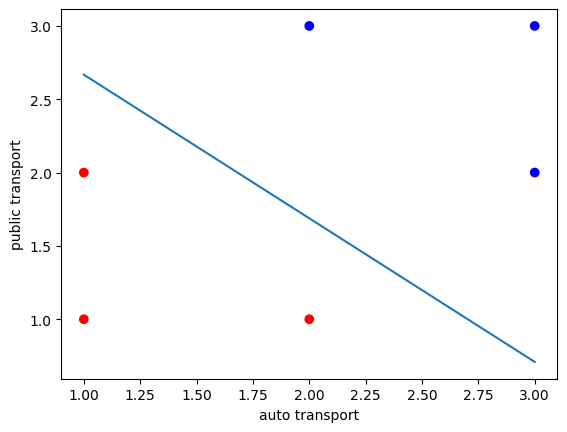

In [18]:
#visualization(시각화)

slope=w_hat[0]/w_hat[1]
xx=np.linspace(np.min(x_train[:,0]),np.max(x_train[:,0]))
yy=-slope*xx-b_hat/w_hat[1]

colors=['red' if I==0 else 'blue' for I in y_train]
plt.xlabel("auto transport")
plt.ylabel("public transport")
plt.scatter(x_train[:,0],x_train[:,1],label='Logistics regression', color=colors)
plt.plot(xx,yy,label='Decision Boundary')
plt.show()

In [22]:
#accuracy

def accuracy(hypo, label):
  predicted=tf.cast(hypo>0.5, dtype=tf.float32)
  accuracyd=tf.reduce_mean(tf.cast(tf.equal(predicted, label),dtype=tf.float32))
  return accuracyd

acc=accuracy(hypothesis(x_test),y_test).numpy()
print("Accuracy: %s" % acc)

Accuracy: 1.0


In [21]:
#prediction

x_test=np.array([[3.,0.],
                 [4., 1.]],
                dtype=np.float32)
y_test=np.array([[0.],
                 [1.]],
                dtype=np.float32)
x_test_predict=hypothesis(x_test)
print("Prob:\n", x_test_predict.numpy())
print("Result:\n",tf.cast(x_test_predict>0.5,dtype=tf.float32).numpy())

Prob:
 [[0.31]
 [0.8 ]]
Result:
 [[0.]
 [1.]]
